In [14]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import GridSearchCV

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train: {}".format(x_train.shape))
print("Test: {}".format(x_test.shape))

Train: (60000, 28, 28)
Test: (10000, 28, 28)


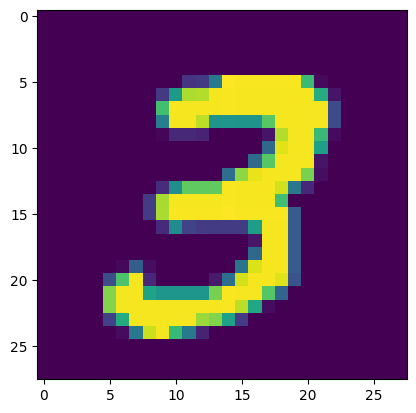

In [6]:
#visualize

plt.imshow(x_train[7])
plt.show()

In [7]:
# Normalize

x_train = x_train.reshape(60000, 28, 28, 1).astype("float32")
x_test = x_test.reshape(10000, 28, 28, 1).astype("float32")

x_train, x_test = x_train / 255, x_test / 255

x_train[7]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [8]:
# Encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[7])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
# spliting data

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [12]:
# building model

model = Sequential()

# convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

#output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


result = model.fit(x_train, y_train, epochs=5, verbose = 0, batch_size=64, validation_data=(x_val, y_val))

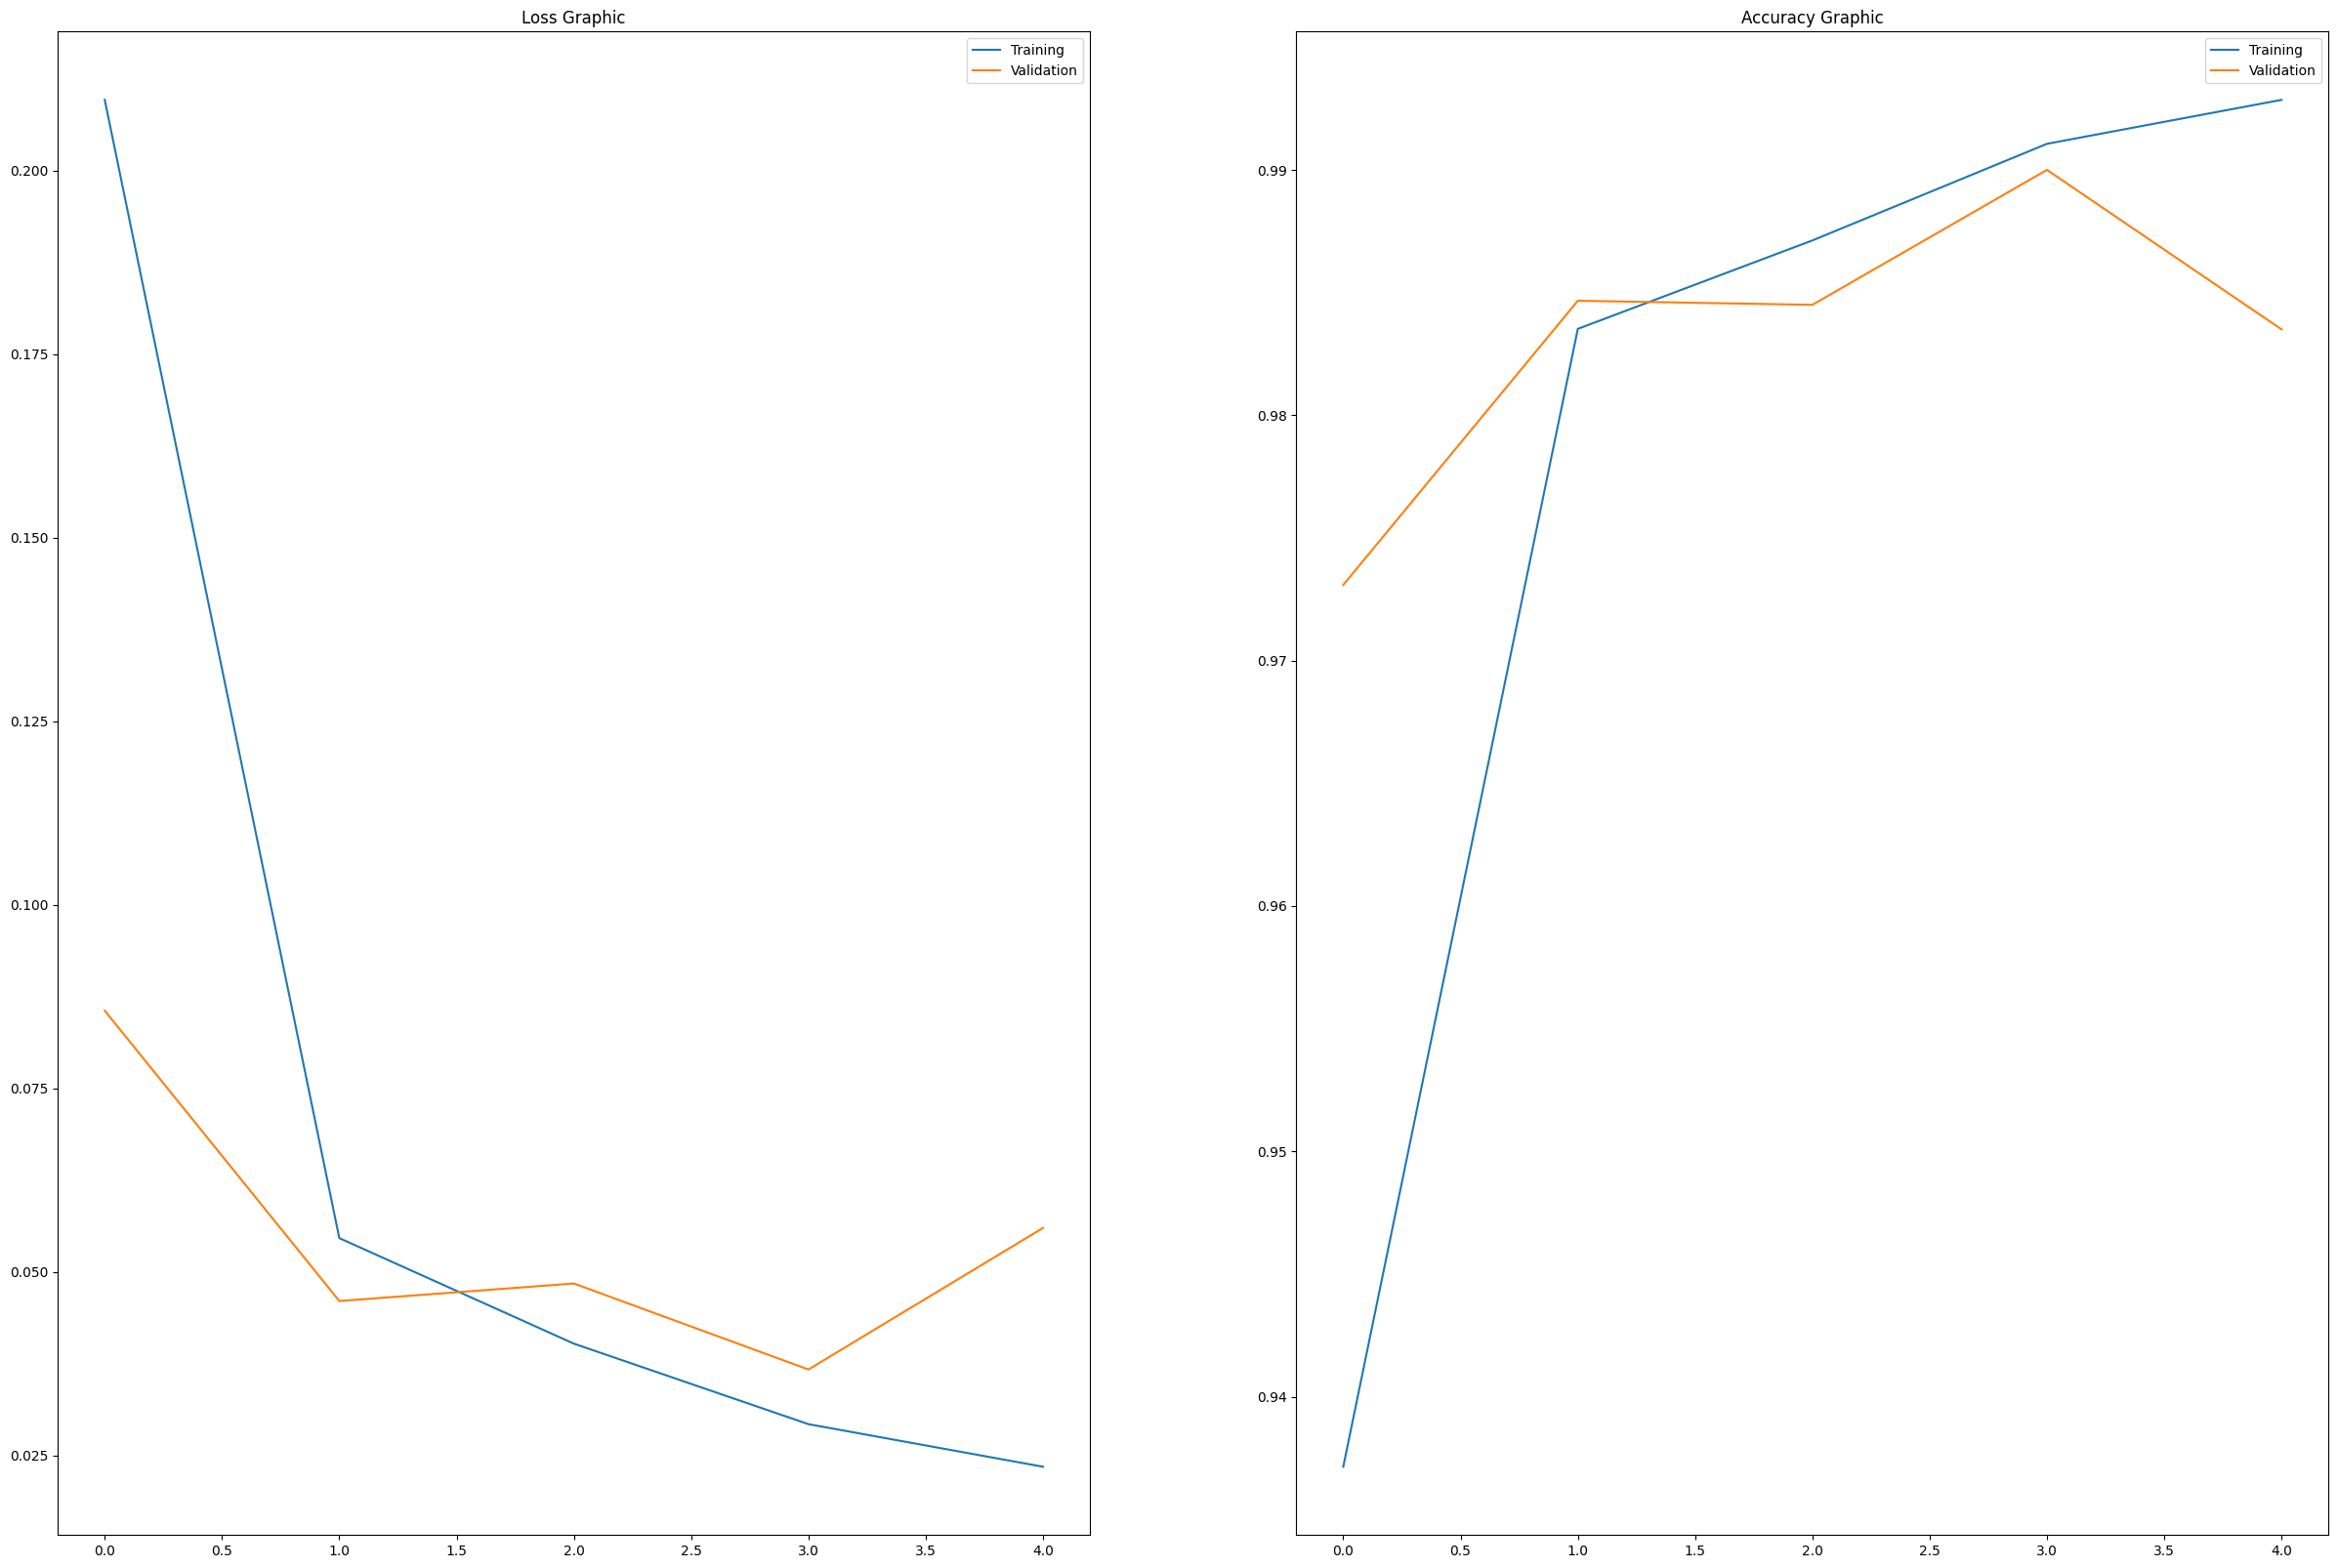

In [20]:
#visualize
fig, ax = plt.subplots(1, 2, figsize = (30, 20))

ax[0].plot(result.history['loss'], label = 'Training')
ax[0].plot(result.history["val_loss"], label = 'Validation')
ax[0].set_title("Loss Graphic")
ax[0].legend()

ax[1].plot(result.history['accuracy'], label = 'Training')
ax[1].plot(result.history["val_accuracy"], label = 'Validation')
ax[1].set_title("Accuracy Graphic")
ax[1].legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


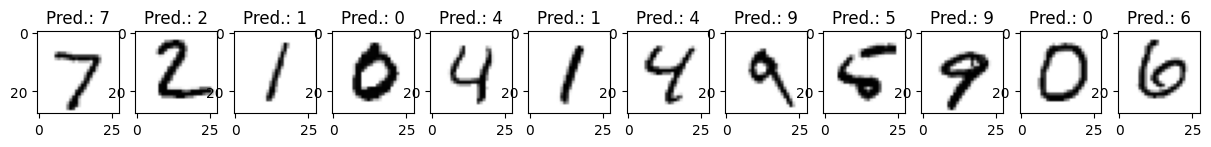

In [28]:
plt.figure(figsize = (15, 5))
im = 12
pred = model.predict(x_test)

for i in range(im):
  plt.subplot(1, im, i + 1)
  plt.imshow(x_test[i], cmap = plt.cm.binary)
  plt.title(f"Pred.: {np.argmax(pred[i])}")

plt.show()